### Score: `[55]`

1.1 `[16.5]` Great job!

1.2 `[22]` Great job!

1.3 `[5.5]` Great job!

[Bonus] `[11]`

各题批注用`### Note`给出，请自行查阅。

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import pandas as pd

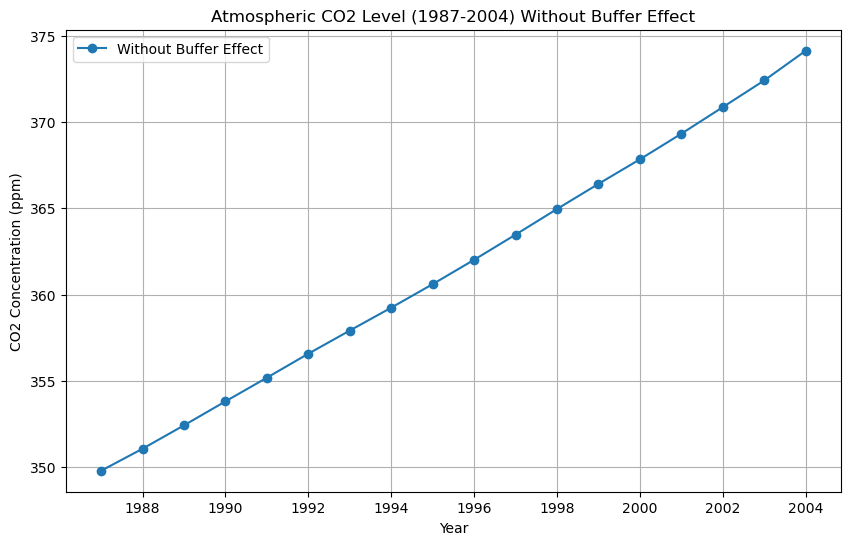

374.13880438302306

In [19]:
# 1.1 
# Constants and initial values
k12 = 105 / 740  # transfer coefficient from atmosphere to ocean (yr^-1)
k21 = 102 / 900  # transfer coefficient from ocean to atmosphere (yr^-1)
N1_initial = 740  # Atmospheric carbon in PgC
N2_initial = 900  # Surface ocean carbon in PgC
t_start, t_end = 1985, 2004  # Simulation period 
dt = 1  # Time step in years

# Read the global data from the Excel file
df = pd.read_excel('global.1751_2010.xlsx')

# Extract γ values for years 1987 to 2004 and convert to PgC/year
γ_values = df.loc[(df['Year'] >= 1985) & (df['Year'] <= 2004), 'gamma'] * 0.001  # Convert from MtC to PgC

# Reset index of γ_values to align with years in the simulation
γ_values.reset_index(drop=True, inplace=True)

# Time array
years = np.arange(t_start, t_end + 1, dt)
N1_no_buffer = np.zeros_like(years, dtype=float)
N2_no_buffer = np.zeros_like(years, dtype=float)

# Initialize arrays
N1_no_buffer[0] = N1_initial
N2_no_buffer[0] = N2_initial

# Without buffer effect (Equations 1-2)
for t in range(1, len(years)):
    γ = γ_values[t - 1]  # Get the γ value for the current year
    dN1_dt = -k12 * N1_no_buffer[t - 1] + k21 * N2_no_buffer[t - 1] + γ
    dN2_dt = k12 * N1_no_buffer[t - 1] - k21 * N2_no_buffer[t - 1]
    N1_no_buffer[t] = N1_no_buffer[t - 1] + dN1_dt * dt
    N2_no_buffer[t] = N2_no_buffer[t - 1] + dN2_dt * dt

# Convert N1 to ppm
ppm_no_buffer = N1_no_buffer / 2.13

# Filter data for 1987-2004 (skip the first year, 1986)
years_filtered = years[2:]
ppm_no_buffer_filtered = ppm_no_buffer[2:]

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(years_filtered, ppm_no_buffer_filtered, label="Without Buffer Effect", marker="o")
plt.title("Atmospheric CO2 Level (1987-2004) Without Buffer Effect")
plt.xlabel("Year")
plt.ylabel("CO2 Concentration (ppm)")
plt.legend()
plt.grid(True)
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(MultipleLocator(2))  # Major ticks every 2 years
plt.show()

ppm_no_buffer[-1]  # Show the CO2 level in 2004


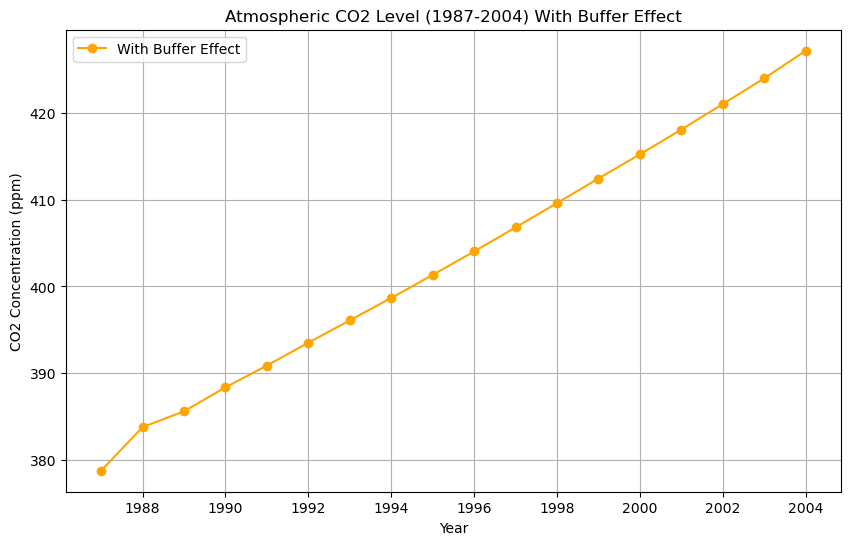

427.2036214472199

In [20]:
# 1.2
# Constants for the buffer effect model
N2_eq = 821  # Equilibrium carbon content in the surface ocean (PgC)

# Read the CO2 data from 'co2_annmean_mlo.csv'
df_co2 = pd.read_csv('co2_annmean_mlo.csv')

# Extract the CO2 concentrations ('mean') for the years 1987 to 2004
co2_values = df_co2.loc[(df_co2['year'] >= 1985) & (df_co2['year'] <= 2004), 'mean']

# Arrays for the buffer effect model
N1_buffer = np.zeros_like(years, dtype=float)
N2_buffer = np.zeros_like(years, dtype=float)

# Initialize arrays
N1_buffer[0] = 740
N2_buffer[0] = 900

# With buffer effect (Equations 3-4)
for t in range(1, len(years)):
    z = co2_values.iloc[t - 1]  # CO2 concentration (ppm) for the current year
    ξ = 3.69 + 1.86e-2 * z - 1.80e-6 * z**2  # Calculate ξ based on the CO2 concentration
    γ = γ_values[t - 1]  # Get the γ value for the current year
    dN1_dt = -k12 * N1_buffer[t - 1] + k21 * (N2_eq + ξ * (N2_buffer[t - 1] - N2_eq)) + γ
    dN2_dt = k12 * N1_buffer[t - 1] - k21 * (N2_eq + ξ * (N2_buffer[t - 1] - N2_eq))
    N1_buffer[t] = N1_buffer[t - 1] + dN1_dt * dt
    N2_buffer[t] = N2_buffer[t - 1] + dN2_dt * dt

# Convert N1 to ppm
ppm_buffer = N1_buffer / 2.13

# Filter data for 1987-2004 (skip the first year, 1986)
years_filtered2 = years[2:]
ppm_buffer_filtered = ppm_buffer[2:]

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(years_filtered2, ppm_buffer_filtered, label="With Buffer Effect", marker="o", color="orange")
plt.title("Atmospheric CO2 Level (1987-2004) With Buffer Effect")
plt.xlabel("Year")
plt.ylabel("CO2 Concentration (ppm)")
plt.legend()
plt.grid(True)
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(MultipleLocator(2))  # A master scale is set every 2 years

plt.show()

ppm_buffer[-1]  # Show the CO2 level in 2004


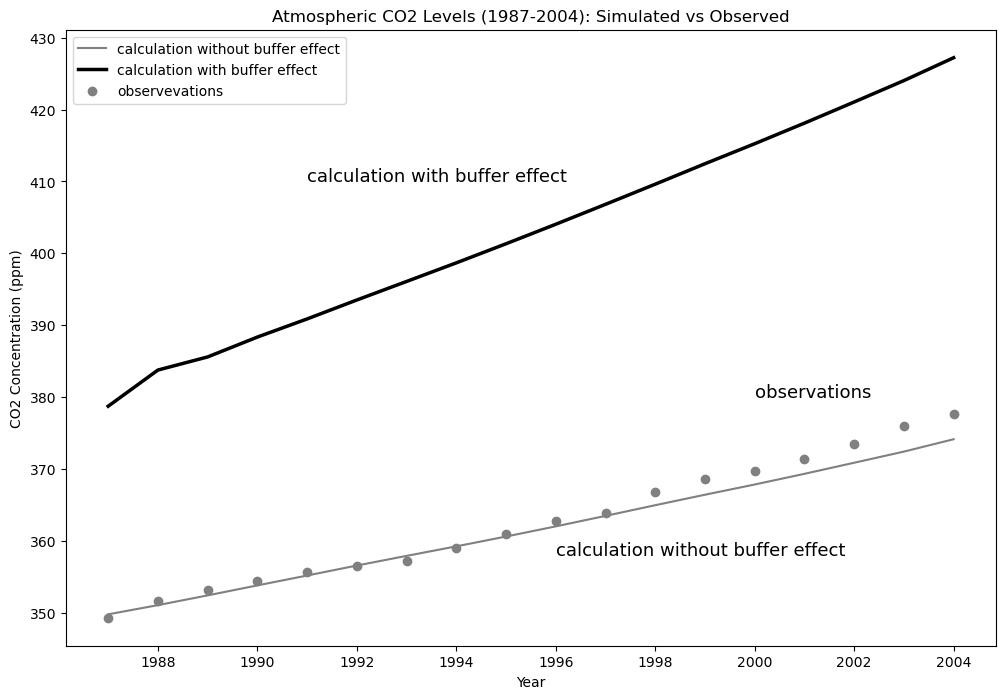

In [33]:
# 1.3
# Load the CSV file, skipping comment lines
data = pd.read_csv('co2_annmean_mlo.csv')

# Rename columns for clarity
data.columns = ['year', 'mean', 'unc']

# Extract data for 1987-2004
subset = data[(data['year'] >= 1987) & (data['year'] <= 2004)]

# Extract years and CO2 concentrations
observation_years = subset['year'].values
observation_co2 = subset['mean'].values

# Combine and plot results
plt.figure(figsize=(12, 8))

# Plot simulated data (assuming `years`, `ppm_no_buffer`, and `ppm_buffer` are available)
plt.plot(years_filtered, ppm_no_buffer_filtered, label="calculation without buffer effect", linestyle="-", linewidth=1.5, color="gray")
plt.plot(years_filtered2, ppm_buffer_filtered, label="calculation with buffer effect", linestyle="-", linewidth=2.5, color="black")

# Plot observation data
plt.scatter(observation_years, observation_co2, label="observevations", color="gray", zorder=5)

# Add labels and title
plt.title("Atmospheric CO2 Levels (1987-2004): Simulated vs Observed") ### Note: CO$_2$，注意标题下标小写更好~
plt.xlabel("Year")
plt.ylabel("CO2 Concentration (ppm)")
# Add label box example
plt.text(1991, 410, 'calculation with buffer effect', fontsize=13, color='black')
plt.text(2000, 380, 'observations', fontsize=13, color='black')
plt.text(1996, 358, 'calculation without buffer effect', fontsize=13, color='black')
plt.legend()
plt.grid(False)
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(MultipleLocator(2))  # A master scale is set every 2 years

plt.show()


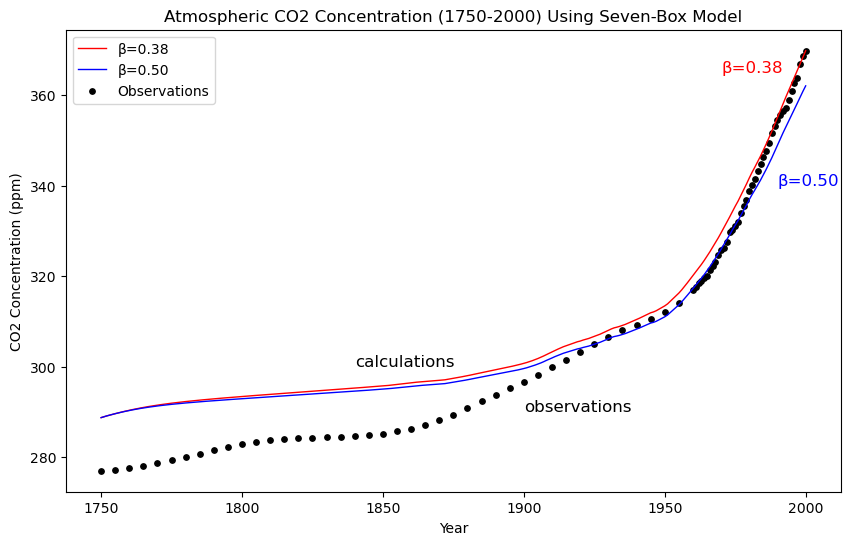

In [37]:
# [Bonus]

# Constants
k12 = 60 / 615         # Transfer coefficient: atmosphere to surface ocean (yr^-1)
k21 = 60 / 842         # Transfer coefficient: surface ocean to atmosphere (yr^-1)
k23 = 9 / 842          # Transfer coefficient: surface ocean to intermediate ocean (yr^-1)
k32 = 52 / 9744        # Transfer coefficient: intermediate ocean to surface ocean (yr^-1)
k24 = 43 / 842         # Transfer coefficient: surface ocean to deep ocean (yr^-1)
k34 = 162 / 9744       # Transfer coefficient: intermediate ocean to deep ocean (yr^-1)
k43 = 205 / 26280      # Transfer coefficient: deep ocean to intermediate ocean (yr^-1)
k45 = 0.2 / 26280      # Transfer coefficient: deep ocean to sediments (yr^-1)
k51 = 0.2 / 90000000   # Transfer coefficient: sediments to atmosphere (yr^-1)
k67 = 62 / 731         # Transfer coefficient: biosphere to soil (yr^-1)
k71 = 62 / 1238        # Transfer coefficient: soil to atmosphere (yr^-1)  # ? 在这里发现一个问题:文章中的Fig.3用的是1238但计算系数k71时用的1328，我进行了更正统一用1239

# Initial carbon content in PgC (1750 values)
N1_initial = 615       # Atmosphere
N2_initial = 842       # Surface ocean
N3_initial = 9744      # Intermediate ocean
N4_initial = 26280     # Deep ocean
N5_initial = 90000000  # Sediments
N6_initial = 731       # Biosphere
N7_initial = 1238      # Soil

# Preindustrial equilibrium value for surface ocean
N2_eq = 842            # PgC

# Time settings
t_start, t_end = 1750, 2000
years = np.arange(t_start, t_end + 1)
dt = 1

# Preindustrial CO2 concentration and fertilization factor
P0 = 289               # ppm
f0 = 62                # PgC/year
β_values = [0.38, 0.50]  # Fertilization factors

# Read the global data from the Excel file
df = pd.read_excel('global.1750_2010.xlsx')
# Extract γ values for years 1750 to 2000 and convert to PgC/year
γ_values = df.loc[(df['Year'] >= 1750) & (df['Year'] <= 2000), 'gamma'] * 0.001  # Convert from MtC to PgC
# Reset index of γ_values to align with years in the simulation
γ_values.reset_index(drop=True, inplace=True)

# Read the CO2 data from 'co2_annmean_mlo.csv'
df_co2 = pd.read_excel('co2_annmean_mlo.xlsx')
# 该数据由ice core data和Mauna Loa CO2 annual mean data组合得到
# Extract the CO2 concentrations ('mean') for the years 1750 to 2000
co2_values = df_co2.loc[(df_co2['year'] >= 1750) & (df_co2['year'] <= 2000), 'mean']

# Read the Global_land-use_flux data from 'Global_land-use_flux.xlsx'
df_δ = pd.read_excel('Global_land-use_flux.xlsx')
# CO2 emission to the atmosphere by changes in land-use  was estimated by Houghton et al. and data from 1850 to  2000 are available.9 The trend before 1850 is obtained by linearly interpolating from 0.2 PgC/ year in 1750 to  0.5 PgC/ year in 1850.
# 跟据文章的提示这里对1850前的值进行了线性插值计算（0.2-0.5 PgC/year)并保存到了处理好的表格中以供直接调取使用
# Extract the CO2 concentrations ('mean') for the years 1987 to 2004
δ_values = df_δ.loc[(df_δ['year'] >= 1750) & (df_δ['year'] <= 2000), 'delta'] 

# Function to run the simulation for a given beta
def run_simulation(β):
    # Initialize arrays for each reservoir
    N1 = np.zeros_like(years, dtype=float)
    N2 = np.zeros_like(years, dtype=float)
    N3 = np.zeros_like(years, dtype=float)
    N4 = np.zeros_like(years, dtype=float)
    N5 = np.zeros_like(years, dtype=float)
    N6 = np.zeros_like(years, dtype=float)
    N7 = np.zeros_like(years, dtype=float)
    
    # Set initial values
    N1[0] = N1_initial
    N2[0] = N2_initial
    N3[0] = N3_initial
    N4[0] = N4_initial
    N5[0] = N5_initial
    N6[0] = N6_initial
    N7[0] = N7_initial
    
    # Run the simulation
    for t in range(1, len(years)):
        # Net primary productivity with fertilization effect (Equation 5-13)
        P = N1[t - 1] / 2.13  # Convert PgC to ppm
        f = f0 * (1 + β * np.log(P / P0))
        
        # Update equations for each reservoir
        γ = γ_values[t - 1]  # Get the γ value for the current year
        δ = δ_values[t - 1]  # Get the δ value for the current year
        z = co2_values.iloc[t - 1]  # CO2 concentration (ppm) for the current year
        ξ = 3.69 + 1.86e-2 * z - 1.80e-6 * z**2  # Calculate ξ based on the CO2 concentration
        dN1_dt = -k12 * N1[t - 1] + k21 * (N2_eq + ξ * (N2[t - 1] - N2_eq)) + γ - f + δ + k51 * N5[t - 1]  + k71 * N7[t - 1]
        dN2_dt = k12 * N1[t - 1] - k21 * (N2_eq + ξ * (N2[t - 1] - N2_eq)) - k23 * N2[t - 1] + k32 * N3[t - 1] - k24 * N2[t - 1]
        dN3_dt = k23 * N2[t - 1] - k32 * N3[t - 1] - k34 * N3[t - 1] + k43 * N4[t - 1]
        dN4_dt = k34 * N3[t - 1] - k43 * N4[t - 1] + k24 * N2[t - 1] - k45 * N4[t - 1]
        dN5_dt = k45 * N4[t - 1] - k51 * N5[t - 1]
        dN6_dt = f - k67 * N6[t - 1] - 2 * δ
        dN7_dt = k67 * N6[t - 1] - k71 * N7[t - 1] + δ
        
        # Update reservoir values
        N1[t] = N1[t - 1] + dN1_dt * dt
        N2[t] = N2[t - 1] + dN2_dt * dt
        N3[t] = N3[t - 1] + dN3_dt * dt
        N4[t] = N4[t - 1] + dN4_dt * dt
        N5[t] = N5[t - 1] + dN5_dt * dt
        N6[t] = N6[t - 1] + dN6_dt * dt
        N7[t] = N7[t - 1] + dN7_dt * dt
    
    # Convert atmospheric carbon to ppm
    ppm = N1 / 2.13
    return ppm

# Run simulations for different beta values
ppm_38 = run_simulation(β_values[0])
ppm_50 = run_simulation(β_values[1])

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(years, ppm_38, label=f"β=0.38", color = 'red', linewidth=1)
plt.plot(years, ppm_50, label=f"β=0.50", color = 'blue', linewidth=1)

# Year and CO2 observations were selected in stages
years_1750_1950 = years[(years >= 1750) & (years <= 1960)][::5]  # 1750到1950年，每5年取一个
co2_values_1750_1950 = co2_values[(years >= 1750) & (years <= 1960)][::5]

years_1950_2000 = years[(years > 1960) & (years <= 2000)]      # 1950到2000年，每年取一个
co2_values_1950_2000 = co2_values[(years > 1960) & (years <= 2000)]

# Merge data for two time periods
years_combined = np.concatenate([years_1750_1950, years_1950_2000])
co2_combined = np.concatenate([co2_values_1750_1950, co2_values_1950_2000])

# Plot observation data every 5 years
plt.scatter(years_combined, co2_combined, label="Observations", color="black", s=15)

# Add label box example
plt.text(1970, 365, 'β=0.38', fontsize=12, color='red')
plt.text(1990, 340, 'β=0.50', fontsize=12, color='blue')
plt.text(1840, 300, 'calculations', fontsize=12, color='black')
plt.text(1900, 290, 'observations', fontsize=12, color='black')
plt.title("Atmospheric CO2 Concentration (1750-2000) Using Seven-Box Model")
plt.xlabel("Year")
plt.ylabel("CO2 Concentration (ppm)")
plt.grid(False)
plt.legend()
plt.show()
